In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
#importing data

df_test = pd.read_csv(r'C:\Users\popovyeh\OneDrive - adidas\Documents\vs_code\projects\find_an_extravert\train.csv')

df_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [5]:
print(df_test.shape)

(18524, 9)


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [7]:
df_test.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [8]:
#separate columns by data types

num_cols = df_test.select_dtypes(include = ['int64', 'float64']).columns
cat_cols = df_test.select_dtypes(include = ['object' , 'bool']).columns

print(num_cols)
print(cat_cols)


Index(['id', 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')
Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')


In [ ]:
#checking for missing values

df_test.isna().sum().plot(kind = 'bar')
plt.show()

empty_values = df_test.isna().sum()
empty_values_ratio = empty_values / len(df_test)*100

empty_df = pd.DataFrame({'Values': empty_values, '_%_': empty_values_ratio})
empty_df = empty_df[empty_df['Values'] > 0]
empty_df

,Values,_%_
Time_spent_Alone,1190,6.424098
Stage_fear,1893,10.219175
Social_event_attendance,1180,6.370114
Going_outside,1466,7.914057
Drained_after_socializing,1149,6.202764
Friends_circle_size,1054,5.689916
Post_frequency,1264,6.823580


In [ ]:
#checking for duplicates



In [ ]:
#value counts for cat data

for col in cat_cols:
    print(f'\nunique cols:')
    print(df_test[col].value_counts())




unique cols:
Stage_fear
No     12609
Yes     4022
Name: count, dtype: int64

unique cols:
Drained_after_socializing
No     13313
Yes     4062
Name: count, dtype: int64

unique cols:
Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64


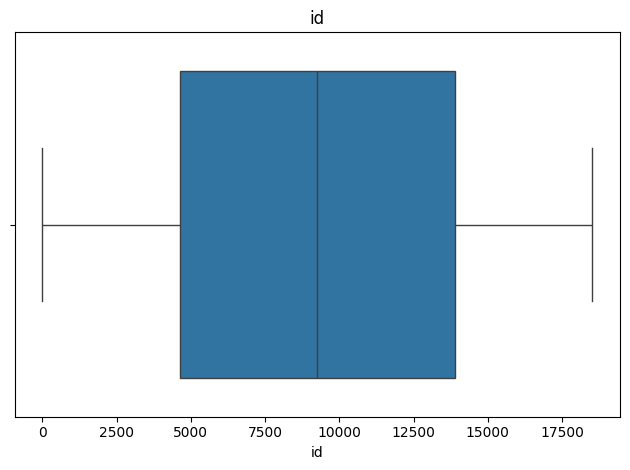

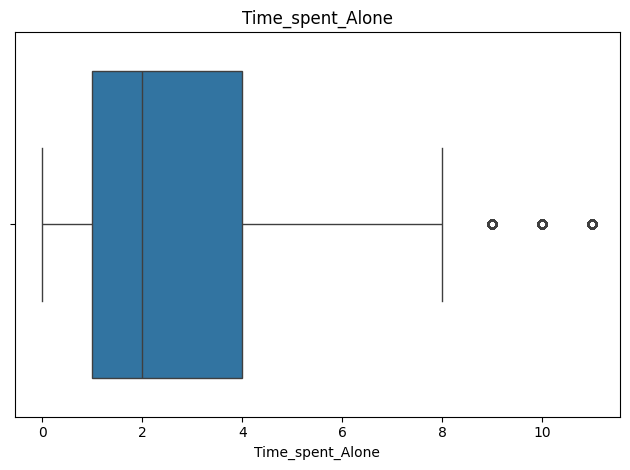

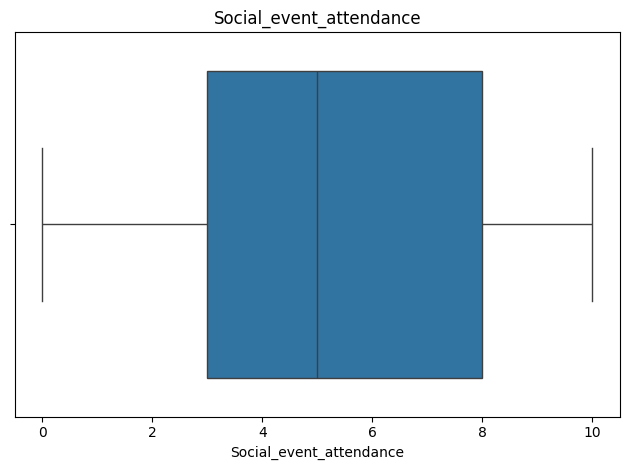

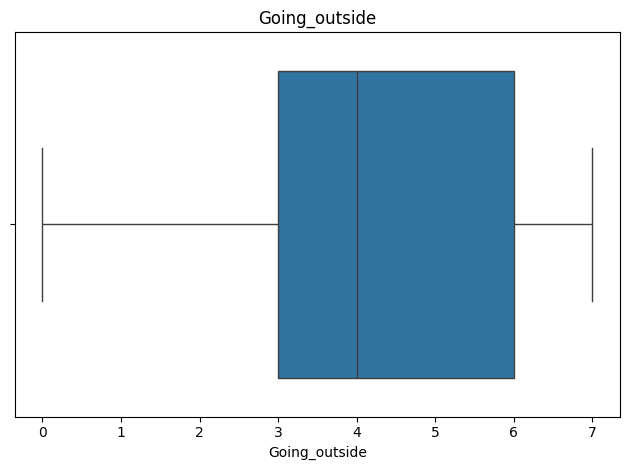

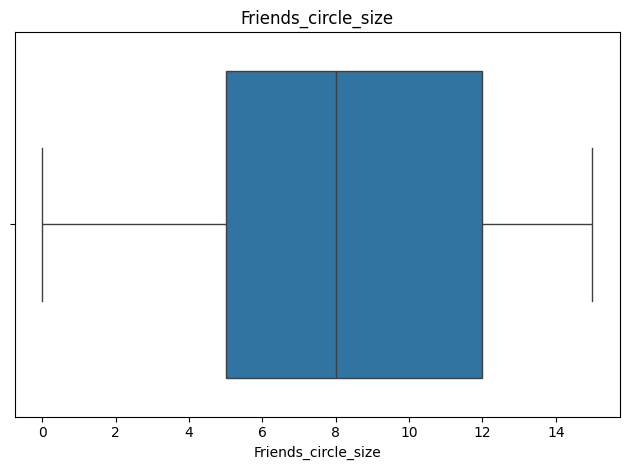

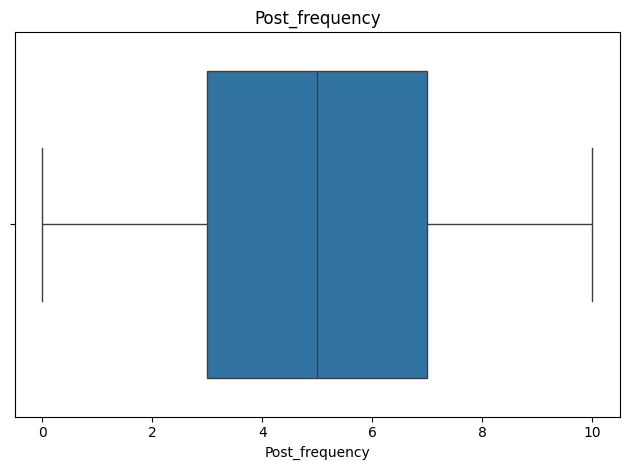

In [39]:
#plotting outliers

for cols in num_cols:
    plt.subplot()
    sns.boxplot(df_test, x = cols)
    plt.title(f'{cols}')
    plt.tight_layout()
    plt.show()
    



In [73]:
#detecting outliers

def check_outlier(data,columns):
   for column in columns: 
        q1 = np.quantile(data[column].dropna(), 0.25)
        q3 = np.quantile(data[column].dropna(), 0.75)
        iqr = q3 - q1

        lower_bound = q1 - iqr * 1.5
        upper_bound = q3 + iqr * 1.5

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        print(f'Outliers in {column}:')

        print(outliers[[column]])
        print('-' * 40)

check_outlier(df_test, num_cols)




Outliers in id:
Empty DataFrame
Columns: [id]
Index: []
----------------------------------------
Outliers in Time_spent_Alone:
       Time_spent_Alone
25                  9.0
27                  9.0
44                  9.0
48                 10.0
55                  9.0
...                 ...
18441              10.0
18448              11.0
18449               9.0
18459              11.0
18501              10.0

[1653 rows x 1 columns]
----------------------------------------
Outliers in Social_event_attendance:
Empty DataFrame
Columns: [Social_event_attendance]
Index: []
----------------------------------------
Outliers in Going_outside:
Empty DataFrame
Columns: [Going_outside]
Index: []
----------------------------------------
Outliers in Friends_circle_size:
Empty DataFrame
Columns: [Friends_circle_size]
Index: []
----------------------------------------
Outliers in Post_frequency:
Empty DataFrame
Columns: [Post_frequency]
Index: []
----------------------------------------


In [71]:


q1 = np.quantile(df_test['Time_spent_Alone'].dropna(), 0.25)
q3 = np.quantile(df_test['Time_spent_Alone'].dropna(), 0.75)
iqr = q3 - q1

lower_bound = q1 - iqr * 1.5
upper_bound = q3 + iqr * 1.5

outliers = df_test[(df_test['Time_spent_Alone'] < lower_bound) | (df_test['Time_spent_Alone'] > upper_bound)]

print(outliers[['Time_spent_Alone']])
print('-' * 40)
print(f'\n{q1,q3,iqr}')

       Time_spent_Alone
25                  9.0
27                  9.0
44                  9.0
48                 10.0
55                  9.0
...                 ...
18441              10.0
18448              11.0
18449               9.0
18459              11.0
18501              10.0

[1653 rows x 1 columns]
----------------------------------------

(np.float64(1.0), np.float64(4.0), np.float64(3.0))


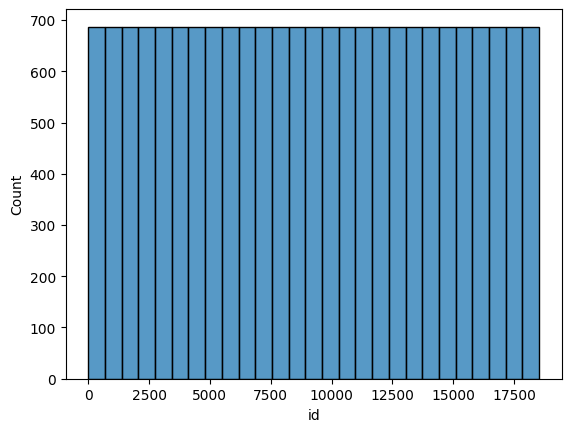

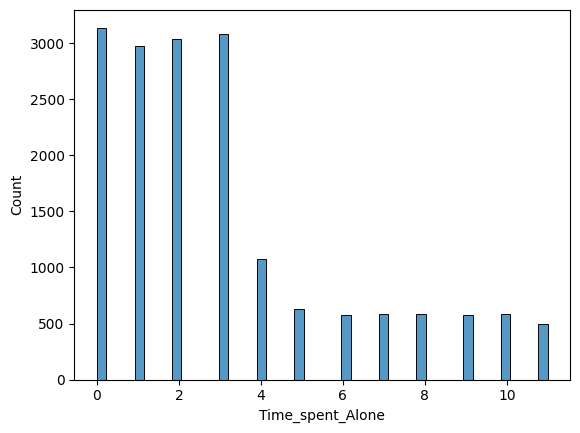

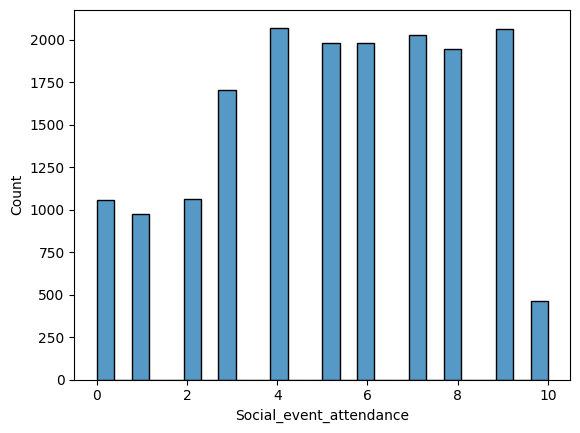

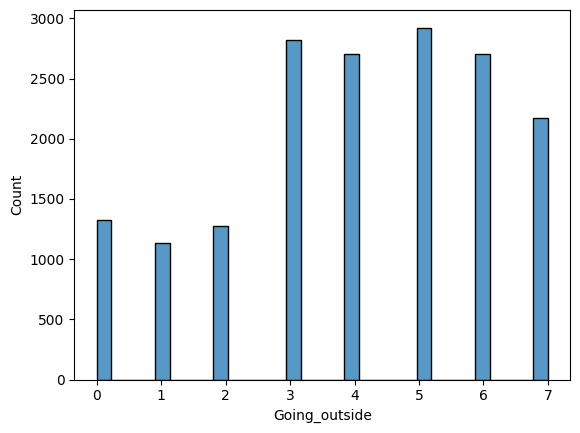

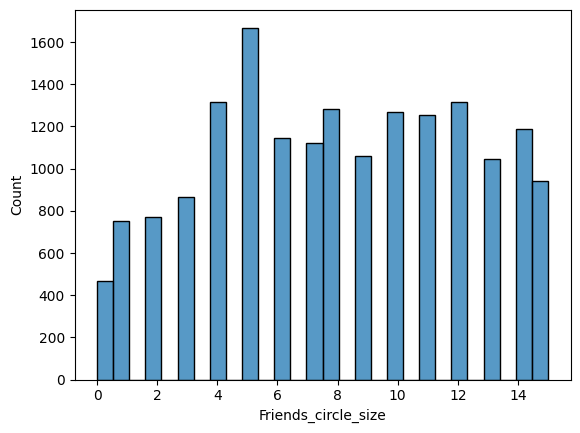

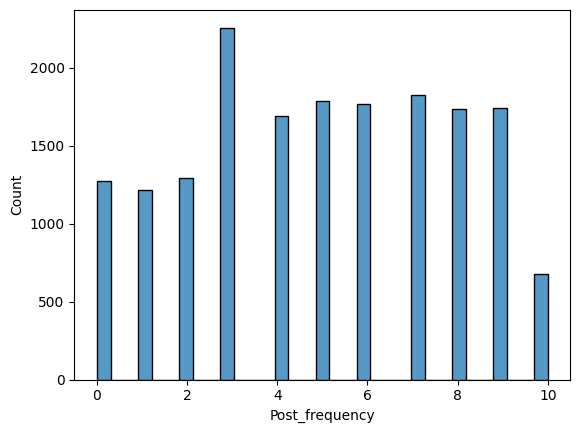

In [74]:
#visualising the spread

for cols in num_cols:
    plt.subplot()
    sns.histplot(df_test, x = cols)
    plt.show()